<div style="text-align: right;">
<h4> <b>Author:</b> <a style="color:blue;">Sujith Kumar</a> </h4>
<h4> <b>Subject:</b> <a style="color:blue;">AdvanceRegression_Assignment</a> </h4>
<h4> <b>Batch:</b> <a style="color:blue;">April 2022</a> </h4>
</div>   

# Surprise Housing - Advance Regression

## Load and Understand the Data

In [72]:
import pandas as pd
import numpy as np
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [73]:
main_df = pd.read_csv("train.csv")

In [74]:
main_df.shape

(1460, 81)

In [75]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
pd.set_option('display.max_columns',None)
main_df.head().append(main_df.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,12

#### print the columns where all values are missing


In [77]:
x_na_fields = main_df.isna().sum()
x_na_fields= x_na_fields[x_na_fields==main_df.shape[0]]
print(x_na_fields)

Series([], dtype: int64)


#### Ordinal Values 
- There are several Ordinal values observed such as ExterQual,BsmtCond etc
- Instead of changing these to ordinal values, they can be handled through dummy variables

#### Check Null Values

In [78]:
x_na_fields = main_df.isna().sum()
x_na_fields= x_na_fields[x_na_fields >0]
print(x_na_fields)
print(type(x_na_fields))

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
<class 'pandas.core.series.Series'>


### From data dictionary it is clear that NA is not missing value but a categorical value for below
- Alley:NA :No alley access
-BsmtQual:NA:No Basement
-BsmtCond:NA:No Basement
-BsmtExposure:NA:No Basement
-BsmtFinType1:NA:No Basement
-BsmtFinType2:NA:No Basement
-FireplaceQu:NA :No Fireplace  
-GarageType :NA :No Garage 
-GarageFinish  :NA :No Garage 
-GarageQual   :NA :No Garage 
-GarageQual   :NA :No Garage 
-GarageCond   :NA :No Garage 
-PoolQC  NA:No Pool
-Fence NA:No Fence
-Misc Feature:NA:None


In [79]:
na_cols=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

Replace all the NA values on above attributes withe None as categorical value

In [80]:
for x in na_cols:
    main_df[x]=main_df[x].fillna("None")


- There are 8 missing rows in MasVnrType and MasVnrArea, determine approach to imputation

In [81]:
main_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

- Since None is most repeating and it also helps easily in marking area as 0 impute with the same

In [82]:
main_df['MasVnrType']=main_df['MasVnrType'].fillna("None")
main_df['MasVnrArea']=main_df['MasVnrArea'].fillna(0)

In [83]:
main_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [84]:
main_df['Electrical']=main_df['Electrical'].fillna('SBrkr')

- We will need to calculate age with current reference as 2022 hence set GarageYrBlt as 2023 indicating not currently built

In [85]:
main_df['GarageYrBlt']=main_df['GarageYrBlt'].fillna(2023)

#### Reprint Missing values for imputation

In [86]:
x_na_fields = main_df.isna().sum()
x_na_fields= x_na_fields[x_na_fields >0]
print(x_na_fields)
print(type(x_na_fields))

LotFrontage    259
dtype: int64
<class 'pandas.core.series.Series'>


In [87]:
main_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [88]:
# Perform median value imputation for lot frontage
main_df['LotFrontage']=main_df['LotFrontage'].fillna(69)
# drop id column
main_df = main_df.drop('Id',axis=1)
main_df.shape

(1460, 80)

#### Calculate Age - Assuming Baseline Date as 01-Jan-2022 based on max values of dataset

In [89]:
#print('max Year Built',main_df.YearBuilt.max(),main_df.YrSold.max())
main_df['BuildAge']=2022-main_df['YearBuilt']
main_df['RemodelAge']=2022-main_df['YearRemodAdd']
main_df['GarageAge']=2022-main_df['GarageYrBlt']
main_df['GarageAge']=main_df['GarageAge'].astype("int32")

In [90]:
main_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuildAge,RemodelAge,GarageAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,19,19,19
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,46,46,46
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,21,20,21
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,107,52,24
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,22,22,22


#### Drop Year columns

In [91]:
main_df = main_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis=1)

Note - Year and Month Sold is not being retained as it would not help in price determination

In [92]:
age_df = main_df[['BuildAge','RemodelAge','GarageAge']]

age_df.describe()

,BuildAge,RemodelAge,GarageAge
count,1460.000000,1460.000000,1460.000000
mean,50.732192,37.134247,41.025342
std,30.202904,20.645407,26.068188
min,12.000000,12.000000,-1.000000
25%,22.000000,18.000000,19.000000
50%,49.000000,28.000000,37.500000
75%,68.000000,55.000000,60.000000
max,150.000000,72.000000,122.000000


#### As can be seen above, age is spread across and to get meaningful insight, need to convert them into bins

In [93]:
#
# Buckets for Year Built
#
main_df_build_bin =  np.arange(0, main_df.BuildAge.max()+10, 10)
main_df['BuildAgebin'] =pd.cut(main_df.BuildAge,main_df_build_bin)
main_df_remodel_bin =  np.arange(0, main_df.RemodelAge.max()+10, 10)
main_df['RemodelAgebin'] =pd.cut(main_df.RemodelAge,main_df_remodel_bin)
main_df_garage_bin =  np.arange(0, main_df.GarageAge.max()+10, 10)
main_df['GarageAge'] =pd.cut(main_df.GarageAge,main_df_garage_bin)

In [94]:
main_df = main_df.drop(['BuildAge','RemodelAge','GarageAge'],axis=1)

In [95]:
main_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,BuildAgebin,RemodelAgebin
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,WD,Normal,208500,"(10, 20]","(10, 20]"
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,WD,Normal,181500,"(40, 50]","(40, 50]"
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,WD,Normal,223500,"(20, 30]","(10, 20]"
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,WD,Abnorml,140000,"(100, 110]","(50, 60]"
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,WD,Normal,250000,"(20, 30]","(20, 30]"


### Observe outliers on target variable

<AxesSubplot:xlabel='SalePrice'>

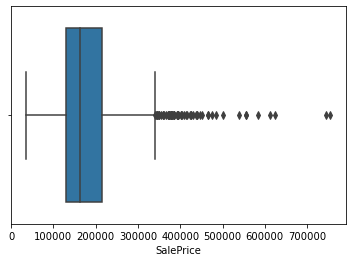

In [96]:
import seaborn as sns
sns.boxplot(data=main_df,x='SalePrice')

In [97]:
main_df[['SalePrice','LotArea']].describe()

,SalePrice,LotArea
count,1460.000000,1460.000000
mean,180921.195890,10516.828082
std,79442.502883,9981.264932
min,34900.000000,1300.000000
25%,129975.000000,7553.500000
50%,163000.000000,9478.500000
75%,214000.000000,11601.500000
max,755000.000000,215245.000000


#### Remove outliers

In [98]:
main_df=main_df[main_df['SalePrice'] < main_df['SalePrice'].quantile(.995)]

In [99]:
main_df.shape

(1452, 77)

In [100]:
main_df[['SalePrice','LotArea']].describe()

,SalePrice,LotArea
count,1452.000000,1452.000000
mean,178495.712810,10447.555096
std,72366.250944,9914.947758
min,34900.000000,1300.000000
25%,129900.000000,7526.250000
50%,162700.000000,9452.500000
75%,213062.500000,11515.500000
max,501837.000000,215245.000000


<AxesSubplot:xlabel='SalePrice'>

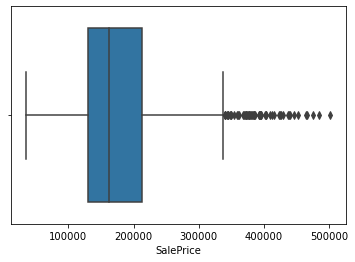

In [101]:
sns.boxplot(data=main_df,x='SalePrice')

### Provide meaningful names to Ordinal value columns

In [102]:
mssubclassmap={20:'1S46N',30:'1S45O',40:'1SFALL',45:'1D5SUN',50:'1D5SF',60:'2S46N',70:'2S45O',75:'2D5SALL',80:'SPLTMLVL',85:'SPLTFYR',90:'DPLX',120:'1SPUD',150:'1D5PUD',160:'2PUD',180:'PUDMLVL',190:'2FCONV'}
qual_cond_map ={10:'VE',9:'E',8:'VG',7:'G',6:'AA',5:'A',4:'BA',3:'F',2:'P',1:'VP'}

In [103]:
main_df['MSSubClass']=main_df['MSSubClass'].map(mssubclassmap)
main_df['OverallQual']=main_df['OverallQual'].map(qual_cond_map)
main_df['OverallCond']=main_df['OverallCond'].map(qual_cond_map)

In [104]:
main_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,BuildAgebin,RemodelAgebin
0,2S46N,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,G,A,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,WD,Normal,208500,"(10, 20]","(10, 20]"
1,1S46N,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,AA,VG,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,WD,Normal,181500,"(40, 50]","(40, 50]"
2,2S46N,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,G,A,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,WD,Normal,223500,"(20, 30]","(10, 20]"
3,2S45O,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,G,A,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,WD,Abnorml,140000,"(100, 110]","(50, 60]"
4,2S46N,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,VG,A,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,WD,Normal,250000,"(20, 30]","(20, 30]"


#### Observe relations between attributes

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

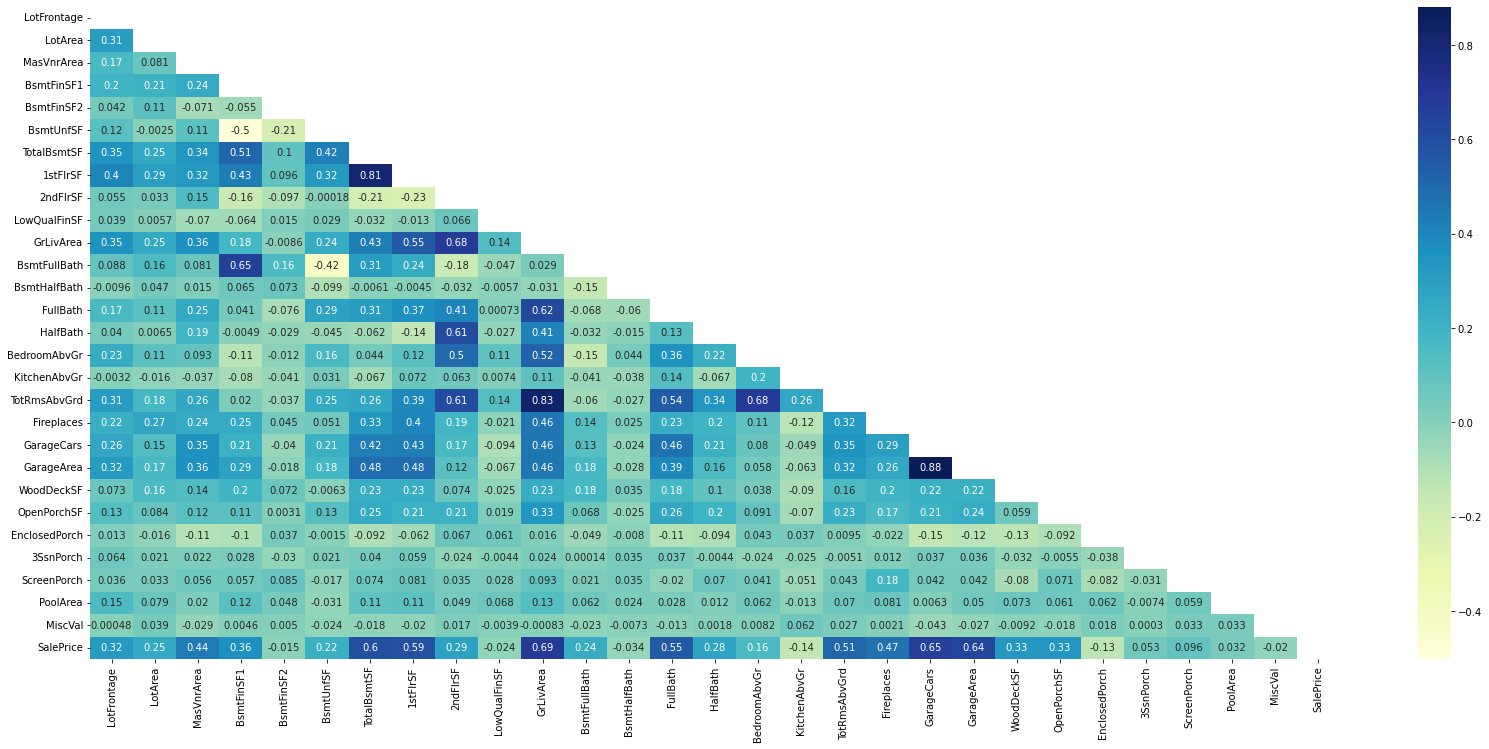

In [106]:
plt.figure(figsize=(28,12))
sns.heatmap(main_df.corr(),cmap="YlGnBu",annot=True,mask=np.triu(main_df.corr()))

The above heatmap tells us the following
- ```GrLivArea```,```GarageCars``` , ```GarageArea```, ```TotalBsmtSF```,```1stFlrSF``` have positive correlation with ```SalePrice```
- Correlation exists among predictors such as  ```TotRmsAbvGrd``` and ```BedroomAbvGr```,```GrLivArea```  ; ```GarageArea``` and ```GarageCars```

#### Plot distribution of variables

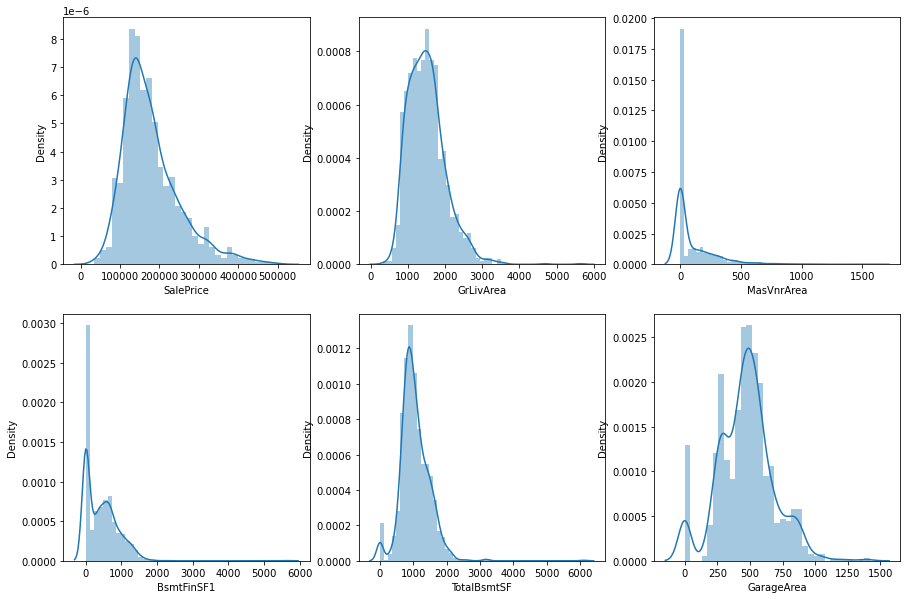

In [107]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
sns.distplot(main_df.SalePrice,ax=axes[0,0])
sns.distplot(main_df.GrLivArea,ax=axes[0,1])
sns.distplot(main_df.MasVnrArea,ax=axes[0,2])
sns.distplot(main_df.BsmtFinSF1,ax=axes[1,0])
sns.distplot(main_df.TotalBsmtSF,ax=axes[1,1])
sns.distplot(main_df.GarageArea,ax=axes[1,2])
plt.show()

#### Check for linear relationship between dependent and independent variables

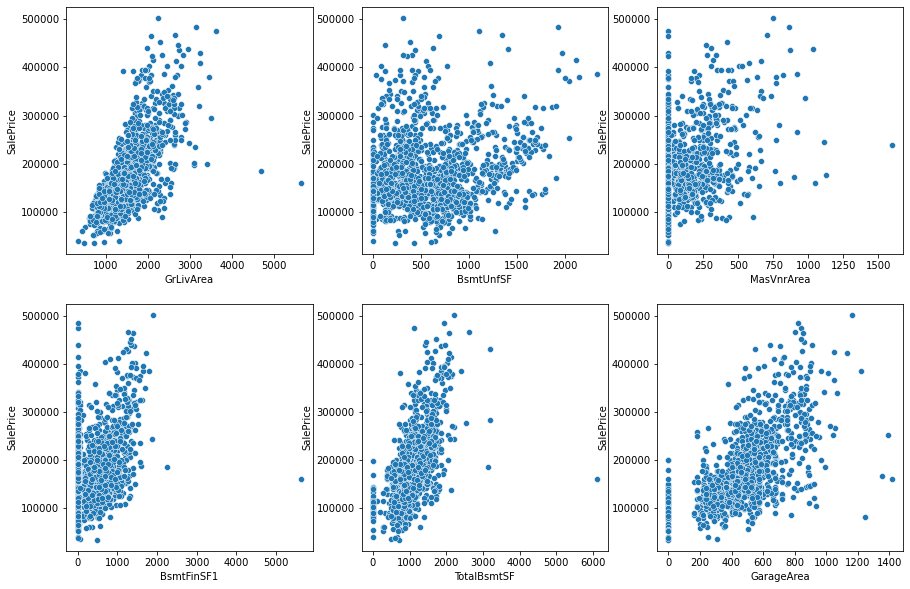

In [108]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
sns.scatterplot(data=main_df, x='GrLivArea', y='SalePrice',ax=axes[0,0])
sns.scatterplot(data=main_df, x='BsmtUnfSF', y='SalePrice',ax=axes[0,1])
sns.scatterplot(data=main_df, x='MasVnrArea' ,y='SalePrice',ax=axes[0,2])
sns.scatterplot(data=main_df, x='BsmtFinSF1' ,y='SalePrice',ax=axes[1,0])
sns.scatterplot(data=main_df, x='TotalBsmtSF', y='SalePrice',ax=axes[1,1])
sns.scatterplot(data=main_df, x='GarageArea' ,y='SalePrice',ax=axes[1,2])
plt.show()

As seen above there seems to be some degree of linearity between target and independent variables

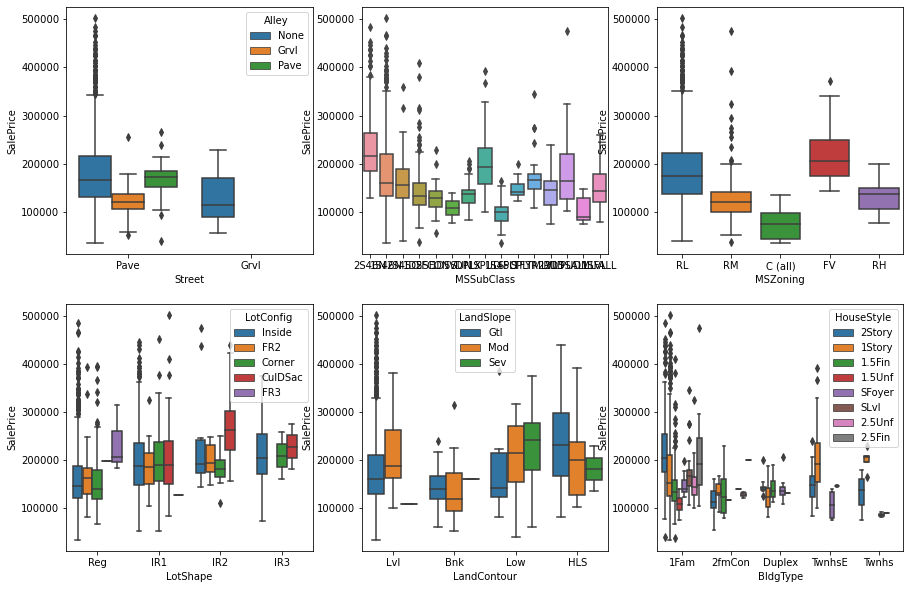

In [109]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
sns.boxplot(data=main_df,y='SalePrice',x='Street',hue='Alley',ax=axes[0,0])
sns.boxplot(data=main_df,y='SalePrice',x='MSSubClass',ax=axes[0,1])
sns.boxplot(data=main_df,y='SalePrice',x='MSZoning',ax=axes[0,2])
sns.boxplot(data=main_df,y='SalePrice',x='LotShape',hue='LotConfig',ax=axes[1,0])
sns.boxplot(data=main_df,y='SalePrice',x='LandContour',hue='LandSlope',ax=axes[1,1])
sns.boxplot(data=main_df,y='SalePrice',x='BldgType',hue='HouseStyle',ax=axes[1,2])
plt.show()

Looks like categorical variables above have influence on Sale Price and can't be directly dropped

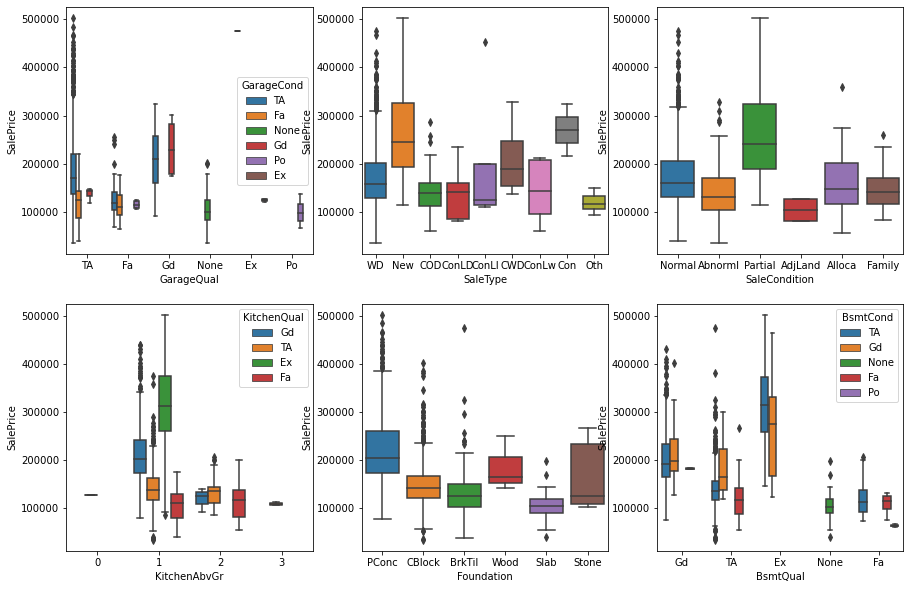

In [110]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
sns.boxplot(data=main_df,y='SalePrice',x='GarageQual',hue='GarageCond',ax=axes[0,0])
sns.boxplot(data=main_df,y='SalePrice',x='SaleType',ax=axes[0,1])
sns.boxplot(data=main_df,y='SalePrice',x='SaleCondition',ax=axes[0,2])
sns.boxplot(data=main_df,y='SalePrice',x='KitchenAbvGr',hue='KitchenQual',ax=axes[1,0])
sns.boxplot(data=main_df,y='SalePrice',x='Foundation',ax=axes[1,1])
sns.boxplot(data=main_df,y='SalePrice',x='BsmtQual',hue='BsmtCond',ax=axes[1,2])
plt.show()

## Split data into X and Y

In [111]:
y = main_df['SalePrice']
X=main_df
X=X.drop('SalePrice',axis=1)

In [112]:
X.shape

(1452, 76)

#### Create dummy variables for categorical values
Mark numeric values which are actually categorical variables as object to ease dummy creation

In [113]:
X['BsmtFullBath']=  X['BsmtFullBath'].astype('object')
X['BsmtHalfBath']=  X['BsmtHalfBath'].astype('object')
X['FullBath']    =  X['FullBath'].astype('object')    
X['HalfBath']    =  X['HalfBath'].astype('object')    
X['BedroomAbvGr']=  X['BedroomAbvGr'].astype('object')
X['KitchenAbvGr']=  X['KitchenAbvGr'].astype('object')
X['TotRmsAbvGrd']=  X['TotRmsAbvGrd'].astype('object')
X['Fireplaces']  =  X['Fireplaces'].astype('object')  
X['GarageCars']  =  X['GarageCars'].astype('object')  

In [114]:
X_cat = X.select_dtypes(include=['object','category'])
X_cat

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,BuildAgebin,RemodelAgebin
0,2S46N,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,G,A,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,TA,TA,Y,None,None,None,WD,Normal,"(10, 20]","(10, 20]"
1,1S46N,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,AA,VG,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,None,None,None,WD,Normal,"(40, 50]","(40, 50]"
2,2S46N,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,G,A,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,None,None,None,WD,Normal,"(20, 30]","(10, 20]"
3,2S45O,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,G,A,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,None,None,None,WD,Abnorml,"(100, 110]","(50, 60]"
4,2S46N,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,VG,A,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,None,None,None,WD,Normal,"(20, 30]","(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2S46N,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,AA,A,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,None,None,None,WD,Normal,"(20, 30]","(20, 30]"
1456,1S46N,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,AA,AA,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,TA,TA,Y,None,MnPrv,None,WD,Normal,"(40, 50]","(30, 40]"
1457,2S45O,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,G,E,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,TA,TA,Y,None,GdPrv,Shed,WD,Normal,"(80, 90]","(10, 20]"
1458,1S46N,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,A,AA,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,1,0,1,0,2,1,Gd,5,Typ,0,None,Attchd,Unf,1,TA,TA,Y,None,None,None,WD,Normal,"(70, 80]","(20, 30]"


In [115]:
X_dummies= pd.get_dummies(X_cat, drop_first=True)
X_dummies.head()

,MSSubClass_1D5SUN,MSSubClass_1S45O,MSSubClass_1S46N,MSSubClass_1SFALL,MSSubClass_1SPUD,MSSubClass_2D5SALL,MSSubClass_2FCONV,MSSubClass_2PUD,MSSubClass_2S45O,MSSubClass_2S46N,MSSubClass_DPLX,MSSubClass_PUDMLVL,MSSubClass_SPLTFYR,MSSubClass_SPLTMLVL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_AA,OverallQual_BA,OverallQual_E,OverallQual_F,OverallQual_G,OverallQual_P,OverallQual_VE,OverallQual_VG,OverallQual_VP,OverallCond_AA,OverallCond_BA,OverallCond_E,OverallCond_F,OverallCond_G,OverallCond_P,OverallCond_VG,OverallCond_VP,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,Gar

#### Drop categorical variables now

In [116]:
X = X.drop(list(X_cat.columns), axis=1)

#### Concatenate dummy variables with data set

In [117]:
X = pd.concat([X, X_dummies], axis=1)

In [118]:
X.shape

(1452, 332)

Import required libraries for model building

In [119]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [120]:
# scaling the features - necessary before using Ridge or Lasso
# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
scaler = StandardScaler()


In [121]:
X_train_uns, X_test_uns, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

In [122]:
print(X_train_uns.shape,X_test_uns.shape,y_train.shape,y_test.shape)

(1161, 332) (291, 332) (1161,) (291,)


In [123]:
X_train =scaler.fit_transform(X_train_uns)
X_test = scaler.transform(X_test_uns)

In [124]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Perform a simple linear regression to see how it performs 

In [125]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [126]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    RSS=np.sum(np.square(y - y_pred))
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} ")
        print(F"RSS Score {name} {RSS} \n")
    return MSE,MAE,R2

In [127]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
get_error_stats(y_train,y_pred_train,"Train")
get_error_stats(y_test,y_pred_test,"Test")

MSE Train 234832586.83702025
MAE Score Train 10558.533063305413
R2 Score Train 0.9546542489150698 
RSS Score Train 272640633317.78052 

MSE Test 2.109628019109708e+29
MAE Score Test 74267791904308.95
R2 Score Test -3.870537363357885e+19 
RSS Score Test 6.13901753560925e+31 



(2.109628019109708e+29, 74267791904308.95, -3.870537363357885e+19)

### As observed above, clearly the linear regression model does not perform well on test data

#### 

# Model 1 : Ridge  (default alpha)

In [128]:
ridge1 = Ridge()
ridge1.fit(X_train_df, y_train)

Ridge()

In [129]:
y_pred_train = ridge1.predict(X_train_df)
get_error_stats(y_train,y_pred_train)

y_pred_test = ridge1.predict(X_test_df)
get_error_stats(y_test,y_pred_test)

MSE Test 235939761.2139224
MAE Score Test 10599.740742087659
R2 Score Test 0.954440455529838 
RSS Score Test 273926062769.36392 

MSE Test 1097939553.2499804
MAE Score Test 17636.51602229674
R2 Score Test 0.7985608825315132 
RSS Score Test 319500409995.7443 



(1097939553.2499804, 17636.51602229674, 0.7985608825315132)

In [130]:
print("Ridge Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)), "alpha=",ridge1.alpha)

Ridge Number of non-zero Coefficients 329 alpha= 1.0


# Model 2 : Lasso  (default alpha)

In [131]:
lasso1 = Lasso()
lasso1.fit(X_train_df, y_train)

Lasso()

In [132]:
y_pred_train = lasso1.predict(X_train_df)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso1.predict(X_test_df)
get_error_stats(y_test,y_pred_test)

MSE Test 234866354.12569067
MAE Score Test 10561.272277496966
R2 Score Test 0.9546477285122267 
RSS Score Test 272679837139.92688 

MSE Test 1101324588.689081
MAE Score Test 17702.274584795934
R2 Score Test 0.797939829624335 
RSS Score Test 320485455308.5226 



(1101324588.689081, 17702.274584795934, 0.797939829624335)

In [133]:
print("Lasso Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)), "alpha=",lasso1.alpha)

Lasso Number of non-zero Coefficients 324 alpha= 1.0


#### 

#### Define range of alphas which can be used in gridcvsearch to determine the optimal alpha

In [134]:
n_alphas = 10
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]


# Ridge - Multi alpha and Gridsearchcv

In [135]:
MSE_train_Ridge=[]
MSE_test_Ridge=[]
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_df, y_train)
    coefs.append(ridge.coef_)
    y_pred_train = ridge.predict(X_train_df)
    MSE_train_Ridge.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = ridge.predict(X_test_df)
    MSE_test_Ridge.append(mean_squared_error(y_test,y_pred_test))

<AxesSubplot:>

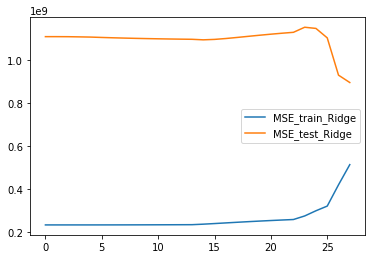

In [136]:
Results = pd.DataFrame({'MSE_train_Ridge':MSE_train_Ridge,"MSE_test_Ridge":MSE_test_Ridge})
Results.plot(legend=True,logx=False)

In [137]:
R2_train_Ridge=[]
R2_test_Ridge=[]
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_df, y_train)
    coefs.append(ridge.coef_)
    y_pred_train = ridge.predict(X_train_df)
    R2_train_Ridge.append(r2_score(y_train,y_pred_train))

    y_pred_test = ridge.predict(X_test_df)
    R2_test_Ridge.append(r2_score(y_test,y_pred_test))

<AxesSubplot:>

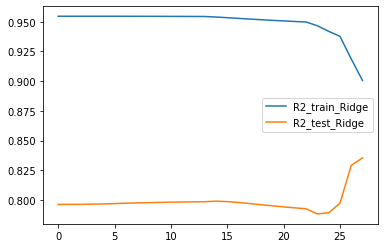

In [138]:
Results = pd.DataFrame({'R2_train_Ridge':R2_train_Ridge,"R2_test_Ridge":R2_test_Ridge})
Results.plot(legend=True,logx=False)

### Multi Ridge Models - Using list of alphas tune to ensure there is no under or overfitting

In [139]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_df, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [140]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_ )

{'alpha': 500}


In [141]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010333,0.001487,0.003468,0.000282,0.0001,{'alpha': 0.0001},-21482.914586,-22544.012778,-17433.941582,-18387.094988,-18279.155579,-19625.423903,2005.837697,28,-9626.545826,-10100.920145,-10180.804299,-10362.098498,-10411.088422,-10136.291438,279.132701
1,0.009871,0.000287,0.002775,0.000488,0.001,{'alpha': 0.001},-21482.287859,-22542.035759,-17434.030916,-18386.272156,-18279.035999,-19624.732538,2005.244461,27,-9626.573825,-10100.872475,-10180.838028,-10362.060479,-10411.083905,-10136.285743,279.117719
2,0.009870,0.001286,0.004547,0.001602,0.01,{'alpha': 0.01},-21476.242819,-22522.548328,-17434.824446,-18378.063423,-18277.842436,-19617.904291,1999.459318,26,-9626.862870,-10100.409413,-10181.219064,-10361.700695,-10411.039148,-10136.246238,278.969211
3,0.015482,0.005469,0.005525,0.002055,0.05,{'alpha': 0.05},-21452.837573,-22441.721267,-17437.202686,-18342.005771,-18272.580496,-19589.269559,1976.365116,25,-9628.279508,-10099.342194,-10183.128984,-10360.436361,-10410.936544,-10136.424718,278.318492
4,0.011876,0.003238,0.003771,0.001189,0.1,{'alpha': 0.1},-21428.436329,-22352.091764,-17437.706916,-18298.689788,-18266.162193,-19556.617398,1952.220335,24,-9629.934968,-10099.181919,-10185.792924,-10359.502354,-10410.916975,-10137.065828,277.655790


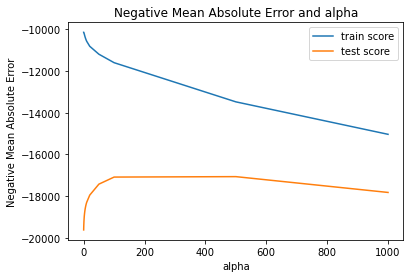

In [142]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [143]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_df, y_train)
print(ridge.coef_)

[  519.93552456  3475.94826107  2729.43251376  2698.91383521
   680.3774204    639.50714624  3712.18884265  5417.13549304
  2693.13932338  -426.78421496  6369.08924435  3296.59181139
  2063.178964    1252.37899424   603.13510379  1004.31811546
  1183.46289835  -134.69593777   309.06967602   166.42941148
 -1303.21498599  1018.54602288   281.53769002 -1402.15588847
   787.364069    -670.76753422 -1520.11677472   930.83972665
   906.9254828   -207.7800303   -774.6069555   -347.56247132
   -68.40818683  1438.38659409  -151.76121509  1285.0546136
 -1180.23380163  1233.74632103   153.69180927   425.08828802
  1194.50904433  -654.01876714   -84.75716062   584.01248793
   -93.46819161   669.07821829     0.          1920.88522686
  -559.69686244  -529.70325489  -368.16526283   715.5230913
   -48.39280072   131.79677356   271.80500338   443.10446376
   910.10118418  -810.66183254  2526.30432674 -2248.74559503
 -1452.22060967  -891.76473101 -1624.6759124  -1076.49664054
 -1324.30379778   244.1756

In [144]:
y_pred_train = ridge.predict(X_train_df)
get_error_stats(y_train,y_pred_train)

y_pred_test = ridge.predict(X_test_df)
get_error_stats(y_test,y_pred_test)

MSE Test 421285670.6334385
MAE Score Test 13531.069539602102
R2 Score Test 0.9186504930448596 
RSS Score Test 489112663605.4221 

MSE Test 931193918.8226645
MAE Score Test 17447.215027218248
R2 Score Test 0.8291537265012339 
RSS Score Test 270977430377.39536 



(931193918.8226645, 17447.215027218248, 0.8291537265012339)

# Residual Plot

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

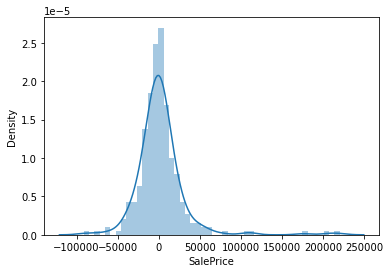

In [145]:
sns.distplot(y_test - y_pred_test)

In [146]:
#### predicted vs residual

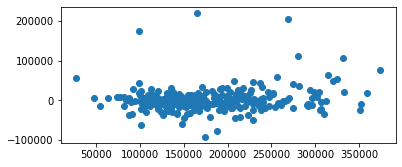

In [147]:
fig, ax = plt.subplots(figsize=(6,2.5))
xplt = ax.scatter(y_pred_test, (y_test - y_pred_test))

# Lasso - Multi alpha and Gridsearchcv

In [148]:
MSE_train_Lasso=[]
MSE_test_Lasso=[]
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_df, y_train)
    coefs.append(lasso.coef_)
    y_pred_train = lasso.predict(X_train_df)
    MSE_train_Lasso.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test_df)
    MSE_test_Lasso.append(mean_squared_error(y_test,y_pred_test))

<AxesSubplot:>

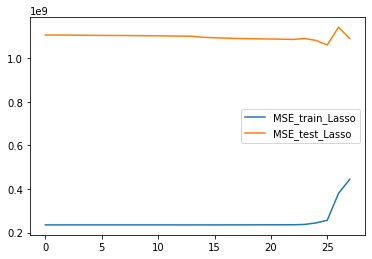

In [149]:
Results2 = pd.DataFrame({'MSE_train_Lasso':MSE_train_Lasso,"MSE_test_Lasso":MSE_test_Lasso})
Results2.plot(legend=True,logx=False)

In [150]:
R2_train_Lasso=[]
R2_test_Lasso=[]
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_df, y_train)
    coefs.append(lasso.coef_)
    y_pred_train = lasso.predict(X_train_df)
    R2_train_Lasso.append(r2_score(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test_df)
    R2_test_Lasso.append(r2_score(y_test,y_pred_test))

<AxesSubplot:>

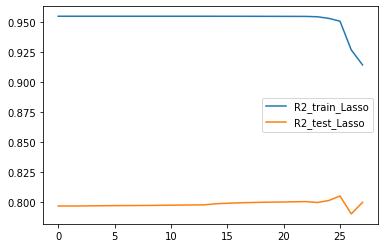

In [151]:
Results = pd.DataFrame({'R2_train_Lasso':R2_train_Lasso,"R2_test_Lasso":R2_test_Lasso})
Results.plot(legend=True,logx=False)

### Multi Lasso Models - Using list of alphas tune to ensure there is no under or overfitting

In [152]:
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_df, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [153]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_ )

{'alpha': 500}


In [154]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.173444,0.024335,0.003255,0.000514,0.0001,{'alpha': 0.0001},-21801.377248,-22280.243149,-17588.310966,-18496.577286,-18297.848385,-19692.871407,1946.621325,28,-9630.761664,-10095.554178,-10182.716307,-10360.427906,-10410.670081,-10136.026027,277.451109
1,0.193656,0.002910,0.004805,0.001593,0.001,{'alpha': 0.001},-21801.186197,-22280.142374,-17588.173825,-18496.546387,-18297.249340,-19692.659624,1946.672469,27,-9630.761513,-10095.551295,-10182.716650,-10360.424035,-10410.668930,-10136.024485,277.450406
2,0.266914,0.073340,0.005763,0.001780,0.01,{'alpha': 0.01},-21799.180875,-22279.134641,-17586.941194,-18496.232279,-18291.427577,-19690.583313,1947.110833,26,-9630.771471,-10095.523338,-10182.723867,-10360.390895,-10410.661687,-10136.014251,277.441043
3,0.175544,0.036796,0.004821,0.001926,0.05,{'alpha': 0.05},-21789.894121,-22274.670885,-17582.720563,-18494.794595,-18266.870000,-19681.790033,1948.547329,25,-9630.870928,-10095.451076,-10182.776278,-10360.277962,-10410.674684,-10136.010186,277.393007
4,0.155691,0.010396,0.003275,0.000455,0.1,{'alpha': 0.1},-21778.437299,-22269.073039,-17578.774143,-18490.397423,-18241.294663,-19671.595314,1949.695491,24,-9631.026576,-10095.497542,-10182.877191,-10360.109649,-10410.705707,-10136.043333,277.317302


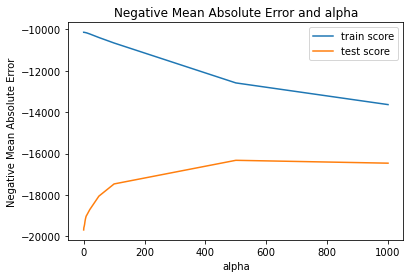

In [155]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

In [156]:
alpha = 500
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_df, y_train)
print(lasso.coef_)

[-0.00000000e+00  4.06900216e+03  1.70114575e+03  1.60532919e+03
  0.00000000e+00 -0.00000000e+00  2.92717349e+03  2.29486621e+03
  0.00000000e+00 -1.17274087e+03  2.38126778e+04  2.07180059e+03
  1.81244681e+03  6.43742198e+02 -0.00000000e+00  7.67100308e+02
  1.01794838e+03  0.00000000e+00  0.00000000e+00  2.70207564e+02
 -0.00000000e+00  1.77163857e+03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -7.55867142e+02 -9.46590106e+02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.40581958e+02  1.81488261e+03 -0.00000000e+00  1.17930491e+03
 -0.00000000e+00  1.25245662e+03  0.00000000e+00  0.00000000e+00
  1.05831702e+03 -2.67975574e+02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  6.49606379e+02  0.00000000e+00  2.22856090e+03
 -0.00000000e+00 -4.94665384e+02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.14214701e+03  0.00000000e+00  3.13783387e+03 -1.87190132e+03
 -0.00000000e+00 -6.52023

In [157]:
y_pred_train = lasso.predict(X_train_df)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso.predict(X_test_df)
get_error_stats(y_test,y_pred_test)

MSE Test 379607919.8270465
MAE Score Test 13036.244042934175
R2 Score Test 0.9266983919301963 
RSS Score Test 440724794919.201 

MSE Test 1142487630.2857523
MAE Score Test 17884.72063882557
R2 Score Test 0.7903876408476326 
RSS Score Test 332463900413.15393 



(1142487630.2857523, 17884.72063882557, 0.7903876408476326)

#### Residual plot

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

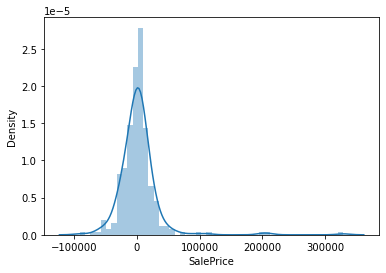

In [158]:
sns.distplot(y_test - y_pred_test)

#### predicted vs Residual

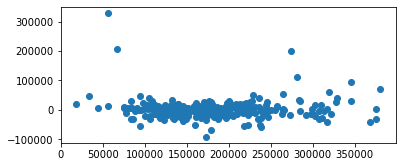

In [159]:
fig, ax = plt.subplots(figsize=(6,2.5))
xplt = ax.scatter(y_pred_test, (y_test - y_pred_test))

## List coefficients after regularization

In [160]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(betas.shape[0])

,Linear,Ridge,Lasso
LotFrontage,1.031802e+03,519.935525,-0.000000e+00
LotArea,8.185915e+03,3475.948261,4.069002e+03
MasVnrArea,1.758330e+03,2729.432514,1.701146e+03
BsmtFinSF1,-1.801439e+15,2698.913835,1.605329e+03
BsmtFinSF2,-6.534730e+14,680.377420,0.000000e+00
BsmtUnfSF,-1.745529e+15,639.507146,-0.000000e+00
TotalBsmtSF,1.730196e+15,3712.188843,2.927173e+03
1stFlrSF,-1.444207e+14,5417.135493,2.294866e+03
2ndFlrSF,-1.599178e+14,2693.139323,0.000000e+00
LowQualFinSF,-1.791876e+13,-426.784215,-1.172741e+03


In [161]:
betas.sort_values(by=['Lasso'],ascending=False)

,Linear,Ridge,Lasso
GrLivArea,1.892547e+14,6369.089244,2.381268e+04
OverallQual_E,8.037500e+03,6833.417532,1.194531e+04
OverallQual_VG,7.685789e+03,4608.239673,9.280963e+03
GarageCars_3,-5.430214e+14,4788.167631,6.179995e+03
SaleType_New,1.060568e+04,2176.303507,5.936681e+03
OverallQual_VE,6.341688e+03,2737.315827,5.417590e+03
Neighborhood_NridgHt,2.143438e+03,4486.767522,4.958708e+03
Neighborhood_StoneBr,4.010438e+03,3879.143703,4.353733e+03
LotArea,8.185915e+03,3475.948261,4.069002e+03
BsmtFullBath_1,2.094883e+03,2957.392012,4.038498e+03


# 

# Solving Assignment Questions below

In [162]:
#### 1) Double Alpha

In [163]:
alpha = 1000
####
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train_df, y_train)
print(".... Ridge alpha doubled .....")
y_pred_train = ridge2.predict(X_train_df)
get_error_stats(y_train,y_pred_train)

y_pred_test = ridge2.predict(X_test_df)
get_error_stats(y_test,y_pred_test)
####

lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train_df, y_train)
print(".... Lasso alpha doubled .....")
y_pred_train = lasso2.predict(X_train_df)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso2.predict(X_test_df)
get_error_stats(y_test,y_pred_test)

betas_dbl = pd.DataFrame(index=X.columns)
betas_dbl.rows = X.columns
betas_dbl['Ridge'] = ridge2.coef_
betas_dbl['Lasso'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(betas.shape[0])

.... Ridge alpha doubled .....
MSE Test 515094863.6083137
MAE Score Test 14804.049094957943
R2 Score Test 0.9005361062324826 
RSS Score Test 598025136649.2522 

MSE Test 896961659.7623084
MAE Score Test 17730.979825040402
R2 Score Test 0.8354343236740555 
RSS Score Test 261015842990.83173 

.... Lasso alpha doubled .....
MSE Test 444320395.0562526
MAE Score Test 14013.119187233542
R2 Score Test 0.9142025290971991 
RSS Score Test 515855978660.30927 

MSE Test 1090133794.0715547
MAE Score Test 17791.46966115427
R2 Score Test 0.7999930062175753 
RSS Score Test 317228934074.8224 



,Linear,Ridge,Lasso
LotFrontage,1.031802e+03,519.935525,-0.000000e+00
LotArea,8.185915e+03,3475.948261,4.069002e+03
MasVnrArea,1.758330e+03,2729.432514,1.701146e+03
BsmtFinSF1,-1.801439e+15,2698.913835,1.605329e+03
BsmtFinSF2,-6.534730e+14,680.377420,0.000000e+00
BsmtUnfSF,-1.745529e+15,639.507146,-0.000000e+00
TotalBsmtSF,1.730196e+15,3712.188843,2.927173e+03
1stFlrSF,-1.444207e+14,5417.135493,2.294866e+03
2ndFlrSF,-1.599178e+14,2693.139323,0.000000e+00
LowQualFinSF,-1.791876e+13,-426.784215,-1.172741e+03


In [164]:
betas.sort_values(by=['Lasso'],ascending=False)

,Linear,Ridge,Lasso
GrLivArea,1.892547e+14,6369.089244,2.381268e+04
OverallQual_E,8.037500e+03,6833.417532,1.194531e+04
OverallQual_VG,7.685789e+03,4608.239673,9.280963e+03
GarageCars_3,-5.430214e+14,4788.167631,6.179995e+03
SaleType_New,1.060568e+04,2176.303507,5.936681e+03
OverallQual_VE,6.341688e+03,2737.315827,5.417590e+03
Neighborhood_NridgHt,2.143438e+03,4486.767522,4.958708e+03
Neighborhood_StoneBr,4.010438e+03,3879.143703,4.353733e+03
LotArea,8.185915e+03,3475.948261,4.069002e+03
BsmtFullBath_1,2.094883e+03,2957.392012,4.038498e+03


## Dropping the 5 top predictors

In [165]:
y_new = main_df['SalePrice']
X_new=main_df
#drop target variable and previously identified top 5 variables
X_new=X_new.drop(['SalePrice','OverallQual','GrLivArea','1stFlrSF','GarageCars','Neighborhood'],axis=1)
# Convert attributes to object type for dummy conversion
X_new['BsmtFullBath']=  X_new['BsmtFullBath'].astype('object')
X_new['BsmtHalfBath']=  X_new['BsmtHalfBath'].astype('object')
X_new['FullBath']    =  X_new['FullBath'].astype('object')    
X_new['HalfBath']    =  X_new['HalfBath'].astype('object')    
X_new['BedroomAbvGr']=  X_new['BedroomAbvGr'].astype('object')
X_new['KitchenAbvGr']=  X_new['KitchenAbvGr'].astype('object')
X_new['TotRmsAbvGrd']=  X_new['TotRmsAbvGrd'].astype('object')
X_new['Fireplaces']  =  X_new['Fireplaces'].astype('object')

In [166]:
X_cat = X_new.select_dtypes(include=['object','category'])
X_dummies= pd.get_dummies(X_cat, drop_first=True)
X_new = X_new.drop(list(X_cat.columns), axis=1)
X_new = pd.concat([X_new, X_dummies], axis=1)

In [167]:
X_train_new_uns, X_test_new_uns, y_train_new, y_test_new = train_test_split(X_new, y_new, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)
                                                    
scaler_new = StandardScaler()
X_train_new =scaler_new.fit_transform(X_train_new_uns)
X_test_new = scaler_new.transform(X_test_new_uns)

X_train_new_df = pd.DataFrame(X_train_new)
X_test_new_df = pd.DataFrame(X_test_new)

In [168]:
#### prepare ridge model for new dataset

In [169]:
ridge_new = Ridge()

# cross validation
folds = 5
model_new_cv = GridSearchCV(estimator = ridge_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_new_cv.fit(X_train_new_df, y_train_new) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [170]:
ridge_new.fit(X_train_new_df, y_train_new)
# Printing the best hyperparameter alpha
print(model_new_cv.best_params_ , "Number of non-zero Coefficients {}".format(np.sum(ridge_new.coef_!=0)))

{'alpha': 100} Number of non-zero Coefficients 290


In [171]:
#### Prepare lasso model for new data set

In [172]:
lasso_new = Lasso()

# cross validation
folds = 5
model_new_cv = GridSearchCV(estimator = lasso_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_new_cv.fit(X_train_new_df, y_train_new) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [173]:
lasso_new.fit(X_train_new_df, y_train_new)
# Printing the best hyperparameter alpha
print(model_new_cv.best_params_ , "Number of non-zero Coefficients {}".format(np.sum(lasso_new.coef_!=0)))

{'alpha': 500} Number of non-zero Coefficients 286


In [174]:
#### Build coefficents as per determined best alphas
ridge_new = Ridge(alpha=100)
ridge_new.fit(X_train_new_df, y_train_new)
lasso_new = Lasso(alpha=500)
lasso_new.fit(X_train_new_df, y_train_new)

Lasso(alpha=500)

In [175]:
betas_new = pd.DataFrame(index=X_new.columns)
betas_new.rows = X_new.columns
betas_new['Ridge'] = ridge_new.coef_
betas_new['Lasso'] = lasso_new.coef_
pd.set_option('display.max_rows', None)
betas_new.head(betas.shape[0])

,Ridge,Lasso
LotFrontage,890.009665,0.000000
LotArea,6470.832330,5393.469970
MasVnrArea,6763.459393,5888.738283
BsmtFinSF1,6070.464082,642.034902
BsmtFinSF2,2032.894620,0.000000
BsmtUnfSF,4290.501460,-0.000000
TotalBsmtSF,11416.744792,19498.041572
2ndFlrSF,8005.329322,12015.502370
LowQualFinSF,-627.028747,-0.000000
GarageArea,9506.983474,9757.084190


In [176]:
betas_new.sort_values(by=['Lasso'],ascending=False)

,Ridge,Lasso
TotalBsmtSF,11416.744792,19498.041572
2ndFlrSF,8005.329322,12015.502370
GarageArea,9506.983474,9757.084190
MasVnrArea,6763.459393,5888.738283
LotArea,6470.832330,5393.469970
SaleType_New,2809.502586,5137.794031
BsmtFinType1_GLQ,3750.244233,4658.437106
TotRmsAbvGrd_9,4980.362274,4166.616182
RoofMatl_CompShg,7351.152758,4010.269277
TotRmsAbvGrd_10,5217.042047,3967.498619
